In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load spectrogram data
LOAD_FROM_FILES = True  # Set to True to load saved data instead of recomputing

if LOAD_FROM_FILES:
    X_train_spectrogram = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/X_train_spectrogram_raw.npy')
    X_val_spectrogram = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/X_val_spectrogram_raw.npy')
    X_test_spectrogram = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/X_test_spectrogram_raw.npy')

In [ ]:
# load feature data
LOAD_FROM_FILES = True

if LOAD_FROM_FILES:
    X_train_feature = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/X_train_feature_raw.npy')
    X_val_feature = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/X_val_feature_raw.npy')
    X_test_feature = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/X_test_feature_raw.npy')
    y_train = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/y_train_feature_raw.npy', allow_pickle=True)
    y_val = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/y_val_feature_raw.npy', allow_pickle=True)
    y_test = np.load('/content/drive/MyDrive/music genre classification/Data/numpy_array_data/y_test_feature_raw.npy', allow_pickle=True)

# Scale features
scaler = StandardScaler()
X_train_feature = scaler.fit_transform(X_train_feature)
X_val_feature = scaler.transform(X_val_feature)
X_test_feature = scaler.transform(X_test_feature)
joblib.dump(scaler, 'scaler.pkl')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
joblib.dump(label_encoder, 'label_encoder.pkl')

# One-hot encoding
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_val = to_categorical(y_val_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)



In [ ]:
# print shape of data
print(f"X_train spectrogram shape: {X_train_spectrogram.shape}")
print(f"X_val spectrogram shape: {X_val_spectrogram.shape}")
print(f"X_test spectrogram shape: {X_test_spectrogram.shape}")
print()
print("="*50)
print(f"\nX_train feature shape: {X_train_feature.shape}")
print(f"X_val feature shape: {X_val_feature.shape}")
print(f"X_test feature shape: {X_test_feature.shape}")
print()
print("="*50)
print(f"\ny_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train spectrogram shape: (25976, 64, 64, 3)
X_val spectrogram shape: (1748, 64, 64, 3)
X_test spectrogram shape: (1749, 64, 64, 3)


X_train feature shape: (25976, 57)
X_val feature shape: (1748, 57)
X_test feature shape: (1749, 57)


y_train shape: (25976, 10)
y_val shape: (1748, 10)
y_test shape: (1749, 10)


In [ ]:
# Load feature models (ANN, 1D-CNN)
feature_model1 = load_model('/content/ann_feature_model.keras')  # ANN
feature_model2 = load_model('/content/cnn_feature_model.keras')  # 1D-CNN

# Load spectrogram models (CNN-GRU, CNN-LSTM)
spectrogram_model1 = load_model('/content/CNN_spectrogram_model.keras')  # CNN
spectrogram_model2 = load_model('/content/GRU_spectrogram_model.keras')  # CNN-GRU
spectrogram_model3 = load_model('/content/LSTM_spectrogram_model.keras')  # CNN-LSTM


812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 100s 122ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step

Ensemble Train Accuracy: 0.9944179242377579
Ensemble Validation Accuracy: 0.950228832951945
Ensemble Test Accuracy: 0.9502572898799314

Classification Report (Ensemble):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.93      0.98      0.96       175
           2       0.91      0.97      0.94       1

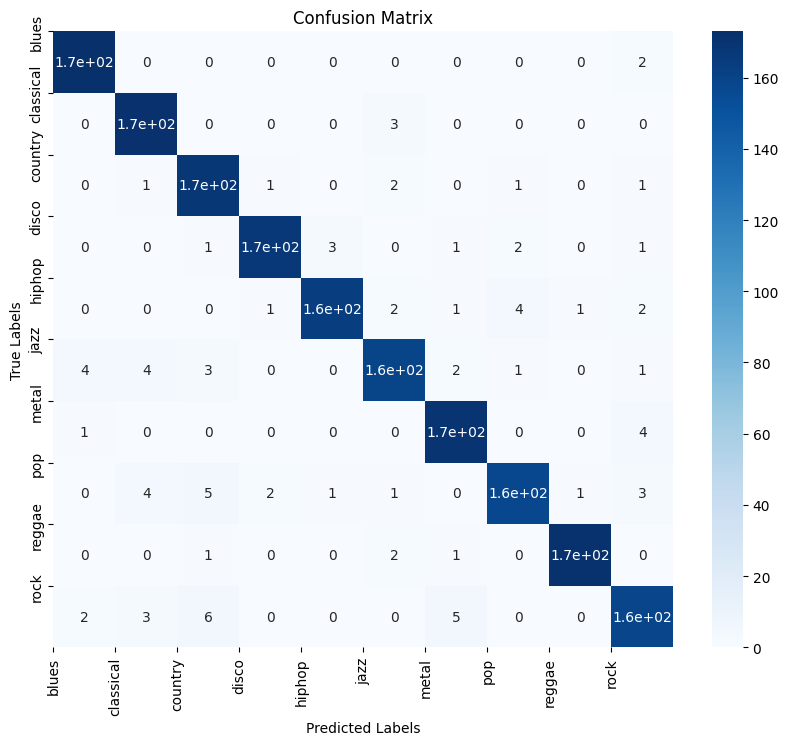

In [ ]:
# feature model predicitons
feature_1_train_pred = feature_model1.predict(X_train_feature)
feature_1_val_pred = feature_model1.predict(X_val_feature)
feature_1_test_pred = feature_model1.predict(X_test_feature)

feature_2_train_pred = feature_model2.predict(X_train_feature)
feature_2_val_pred = feature_model2.predict(X_val_feature)
feature_2_test_pred = feature_model2.predict(X_test_feature)

# spectrogram model predicitons
spectrogram_1_train_pred= spectrogram_model1.predict(X_train_spectrogram)
spectrogram_1_val_pred = spectrogram_model1.predict(X_val_spectrogram)
spectrogram_1_test_pred = spectrogram_model1.predict(X_test_spectrogram)

spectrogram_2_train_pred= spectrogram_model2.predict(X_train_spectrogram)
spectrogram_2_val_pred = spectrogram_model2.predict(X_val_spectrogram)
spectrogram_2_test_pred = spectrogram_model2.predict(X_test_spectrogram)

spectrogram_3_train_pred = spectrogram_model3.predict(X_train_spectrogram)
spectrogram_3_val_pred = spectrogram_model3.predict(X_val_spectrogram)
spectrogram_3_test_pred = spectrogram_model3.predict(X_test_spectrogram)

# Weighted averaging of probabilities
ensemble_train_pred = (feature_1_train_pred + feature_2_train_pred +
                       spectrogram_1_train_pred + spectrogram_2_train_pred + spectrogram_3_train_pred)/5

ensemble_val_pred =  (feature_1_val_pred + feature_2_val_pred +
                      spectrogram_1_val_pred + spectrogram_2_val_pred + spectrogram_3_val_pred)/5

ensemble_test_pred = (feature_1_test_pred + feature_2_test_pred +
                      spectrogram_1_test_pred + spectrogram_2_test_pred + spectrogram_3_test_pred)/5


# Get the predicted class labels for each sample
ensemble_train_pred = np.argmax(ensemble_train_pred, axis=1)
ensemble_val_pred = np.argmax(ensemble_val_pred, axis=1)
ensemble_test_pred = np.argmax(ensemble_test_pred, axis=1)

# Convert true labels to integer form
y_train_labels = np.argmax(y_train, axis=1) #  one-hot encoded labels
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train_labels, ensemble_train_pred)
print(f"\nEnsemble Train Accuracy: {train_accuracy}")

val_accuracy = accuracy_score(y_val_labels, ensemble_val_pred)
print(f"Ensemble Validation Accuracy: {val_accuracy}")

test_accuracy = accuracy_score(y_test_labels, ensemble_test_pred)
print(f"Ensemble Test Accuracy: {test_accuracy}")

print("\nClassification Report (Ensemble):")
print(classification_report(y_test_labels, ensemble_test_pred))

# confusion matrix
print("\nConfusion Matrix (Ensemble):")
conf_matrix = confusion_matrix(y_test_labels, ensemble_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, cmap='Blues',  annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
plt.show()

In [ ]:
def evaluate_model(model, X, y_true, model_name, X_type):

    y_pred = np.argmax(model.predict(X), axis=1)
    y_true_labels = np.argmax(y_true, axis=1)
    accuracy = accuracy_score(y_true_labels, y_pred)
    precision = precision_score(y_true_labels, y_pred, average='weighted')
    recall = recall_score(y_true_labels, y_pred, average='weighted')
    f1 = f1_score(y_true_labels, y_pred, average='weighted')
    return accuracy, precision, recall, f1  # Return all four metrics


# Evaluate individual models and ensemble
models_data = []

# Feature Models
# Note: We only need accuracy here, so we select the first element of the returned tuple
train_acc, _, _, _ = evaluate_model(feature_model1, X_train_feature, y_train, "ANN", "train")
val_acc, _, _, _ = evaluate_model(feature_model1, X_val_feature, y_val, "ANN", "val")
test_acc, precision, recall, f1 = evaluate_model(feature_model1, X_test_feature, y_test, "ANN", "test")
models_data.append(["ANN", train_acc, val_acc, test_acc, precision, recall, f1])

train_acc, _, _, _ = evaluate_model(feature_model2, X_train_feature, y_train, "1D-CNN", "train")
val_acc, _, _, _ = evaluate_model(feature_model2, X_val_feature, y_val, "1D-CNN", "val")
test_acc, precision, recall, f1 = evaluate_model(feature_model2, X_test_feature, y_test, "1D-CNN", "test")
models_data.append(["1D-CNN", train_acc, val_acc, test_acc, precision, recall, f1])

# Spectrogram Models 1
train_acc, _, _, _ = evaluate_model(spectrogram_model1, X_train_spectrogram, y_train, "CNN", "train")
val_acc, _, _, _ = evaluate_model(spectrogram_model1, X_val_spectrogram, y_val, "CNN", "val")
test_acc, precision, recall, f1 = evaluate_model(spectrogram_model1, X_test_spectrogram, y_test, "CNN-GRU", "test")
models_data.append(["CNN", train_acc, val_acc, test_acc, precision, recall, f1])

# Spectrogram Models 2
train_acc, _, _, _ = evaluate_model(spectrogram_model2, X_train_spectrogram, y_train, "CNN-GRU", "train")
val_acc, _, _, _ = evaluate_model(spectrogram_model2, X_val_spectrogram, y_val, "CNN-GRU", "val")
test_acc, precision, recall, f1 = evaluate_model(spectrogram_model2, X_test_spectrogram, y_test, "CNN-LSTM", "test")
models_data.append(["CNN-GRU", train_acc, val_acc, test_acc, precision, recall, f1])

# spectrogram Model 3
train_acc, _, _, _ = evaluate_model(spectrogram_model3, X_train_spectrogram, y_train, "CNN-LSTM", "train")
val_acc, _, _, _ = evaluate_model(spectrogram_model3, X_val_spectrogram, y_val, "CNN-LSTM", "val")
test_acc, precision, recall, f1 = evaluate_model(spectrogram_model3, X_test_spectrogram, y_test, "CNN-LSTM", "test")
models_data.append(["CNN-LSTM", train_acc, val_acc, test_acc, precision, recall, f1])


# Ensemble Model - Assuming train_accuracy, val_accuracy, test_accuracy, etc., are already calculated
models_data.append(["Ensemble", train_accuracy, val_accuracy, test_accuracy, precision_score(y_test_labels, ensemble_test_pred, average='weighted'), recall_score(y_test_labels, ensemble_test_pred, average='weighted'), f1_score(y_test_labels, ensemble_test_pred, average='weighted')])

# Create DataFrame
results = pd.DataFrame(models_data, columns=['Model', 'Train Accuracy','Val Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'])


812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 90s 110ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 59s 73ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step


In [ ]:
# Sort by F1 Score
results = results.sort_values(by='F1 Score', ascending=False)
results


,Model,Train Accuracy,Val Accuracy,Test Accuracy,Precision,Recall,F1 Score
5,Ensemble,0.994418,0.950229,0.950257,0.950689,0.950257,0.950159
0,ANN,0.959001,0.919336,0.910234,0.911202,0.910234,0.910239
2,CNN,0.969934,0.902174,0.905660,0.907114,0.905660,0.905375
1,1D-CNN,0.963274,0.893021,0.897084,0.896849,0.897084,0.896615
3,CNN-GRU,0.965969,0.887300,0.887936,0.887847,0.887936,0.886762
4,CNN-LSTM,0.953072,0.895309,0.878216,0.883236,0.878216,0.878774


  * The ensemble significantly outperforms all individual models in every metrics, showing that combining predictions from multiple models enhances overall performance.
  
  * Among individual models ANN slightly outperforms other models

In [ ]:
import os
import tempfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
from collections import Counter
tf.keras.utils.disable_interactive_logging()

from collections import Counter

def test_music_genre(audio_file):

    def extract_features_segment(audio_data, sr):
        chroma_stft = librosa.feature.chroma_stft(y=audio_data, sr=sr)
        rms = librosa.feature.rms(y=audio_data)
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(audio_data)
        harmony = librosa.effects.harmonic(y=audio_data)
        perceptr = librosa.effects.percussive(y=audio_data)

        # Ensure tempo is stored as a float
        tempo, _ = librosa.beat.beat_track(y=audio_data, sr=sr)
        tempo = float(tempo)  # Fix: Convert tempo to float

        mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=20)

        # Extract mean & variance of each feature
        features = [
            np.mean(chroma_stft), np.var(chroma_stft),
            np.mean(rms), np.var(rms),
            np.mean(spectral_centroid), np.var(spectral_centroid),
            np.mean(spectral_bandwidth), np.var(spectral_bandwidth),
            np.mean(rolloff), np.var(rolloff),
            np.mean(zero_crossing_rate), np.var(zero_crossing_rate),
            np.mean(harmony), np.var(harmony),
            np.mean(perceptr), np.var(perceptr),
            tempo
        ] + list(np.mean(mfccs, axis=1)) + list(np.var(mfccs, axis=1))

        return features


    # Define the function to extract spectrograms from audio
    def create_spectrogram(audio_data, sr, temp_dir, input_shape):
        plt.figure(figsize=(3, 3))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
        plt.axis('off')

        # Use the provided temporary directory
        spectrogram_filename = os.path.join(temp_dir, 'spectrogram.png')
        plt.savefig(spectrogram_filename, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()

        return spectrogram_filename

    # Load the saved models
    feature_model1 = load_model('/content/ann_feature_model.keras')
    feature_model2 = load_model('/content/cnn_feature_model.keras')
    spectrogram_model1 = load_model('/content/CNN_spectrogram_model.keras')
    spectrogram_model2 = load_model('/content/GRU_spectrogram_model.keras')
    spectrogram_model3 = load_model('/content/LSTM_spectrogram_model.keras')


    # Load the scaler and label encoder for feature-based models
    scaler = joblib.load('scaler.pkl')
    label_encoder = joblib.load('label_encoder.pkl')

    # Define a function to preprocess input for feature-based models
    def preprocess_features(audio_data, sr):
        features = extract_features_segment(audio_data, sr)

        features_scaled = scaler.transform(np.array([features]))
        return features_scaled

    # Define a function to preprocess input for spectrogram-based models
    def preprocess_spectrogram(audio_data, sr):
        input_shape = (64, 64, 3)  # Assuming input shape for spectrogram models
        with tempfile.TemporaryDirectory() as temp_dir:
            spectrogram_filename = create_spectrogram(audio_data, sr, temp_dir, input_shape)
            spectrogram = tf.keras.preprocessing.image.load_img(spectrogram_filename, target_size=(input_shape[0], input_shape[1]))
            spectrogram = tf.keras.preprocessing.image.img_to_array(spectrogram)
            spectrogram /= 255.0  # Normalize pixel values to [0, 1]
            spectrogram = np.expand_dims(spectrogram, axis=0)
        return spectrogram


    # Load the audio file
    audio_data, sr = librosa.load(audio_file)

    # Define segment duration (3 seconds)
    segment_duration = 3 * sr

    # Calculate the number of segments
    num_segments = len(audio_data) // segment_duration

    # Define lists to store predictions for each model
    feature_model1_predictions = []
    feature_model2_predictions = []
    spectrogram_model1_predictions = []
    spectrogram_model2_predictions = []
    spectrogram_model3_predictions = []
    ensemble_predictions = []

    for segment_index in range(num_segments):
        start_sample = segment_index * segment_duration
        end_sample = (segment_index + 1) * segment_duration
        segment_audio = audio_data[start_sample:end_sample]

        # Predictions for each individual model
        features_input = preprocess_features(segment_audio, sr)
        spectrogram_input = preprocess_spectrogram(segment_audio, sr)

        # Get raw predictions from models
        feature_model1_prediction = feature_model1.predict(features_input)
        feature_model2_prediction = feature_model2.predict(features_input)
        spectrogram_model1_prediction = spectrogram_model1.predict(spectrogram_input)
        spectrogram_model2_prediction = spectrogram_model2.predict(spectrogram_input)
        spectrogram_model3_prediction = spectrogram_model3.predict(spectrogram_input)

        # Convert raw predictions to labels
        feature_model1_label = label_encoder.inverse_transform([np.argmax(feature_model1_prediction)])[0]
        feature_model2_label = label_encoder.inverse_transform([np.argmax(feature_model2_prediction)])[0]
        spectrogram_model1_label = label_encoder.inverse_transform([np.argmax(spectrogram_model1_prediction)])[0]
        spectrogram_model2_label = label_encoder.inverse_transform([np.argmax(spectrogram_model2_prediction)])[0]
        spectrogram_model3_label = label_encoder.inverse_transform([np.argmax(spectrogram_model3_prediction)])[0]

        # Append label predictions to respective lists
        feature_model1_predictions.append(feature_model1_label)
        feature_model2_predictions.append(feature_model2_label)
        spectrogram_model1_predictions.append(spectrogram_model1_label)
        spectrogram_model2_predictions.append(spectrogram_model2_label)
        spectrogram_model3_predictions.append(spectrogram_model3_label)

        # Average raw predictions for ensemble
        ensemble_prediction = (
            feature_model1_prediction +
            feature_model2_prediction +
            spectrogram_model1_prediction +
            spectrogram_model2_prediction +
            spectrogram_model3_prediction
        ) / 5
        ensemble_label = label_encoder.inverse_transform([np.argmax(ensemble_prediction)])[0]

        ensemble_predictions.append(ensemble_label)


    # Convert predictions to tuples for Counter
    feature_model1_predictions = tuple(feature_model1_predictions)
    feature_model2_predictions = tuple(feature_model2_predictions)
    spectrogram_model1_predictions = tuple(spectrogram_model1_predictions)
    spectrogram_model2_predictions = tuple(spectrogram_model2_predictions)
    spectrogram_model3_predictions = tuple(spectrogram_model3_predictions)
    ensemble_predictions = tuple(ensemble_predictions)

    # Find the most common predictions for each model
    most_common_feature_model1 = Counter(feature_model1_predictions).most_common(1)[0][0]
    most_common_feature_model2 = Counter(feature_model2_predictions).most_common(1)[0][0]
    most_common_spectrogram_model1 = Counter(spectrogram_model1_predictions).most_common(1)[0][0]
    most_common_spectrogram_model2 = Counter(spectrogram_model2_predictions).most_common(1)[0][0]
    most_common_spectrogram_model3 = Counter(spectrogram_model3_predictions).most_common(1)[0][0]
    most_common_ensemble = Counter(ensemble_predictions).most_common(1)[0][0]

    print("Most Common feature_model1 Prediction:", most_common_feature_model1)
    print("Most Common feature_model2 Prediction:", most_common_feature_model2)
    print("Most Common spectrogram_model1 Prediction:", most_common_spectrogram_model1)
    print("Most Common spectrogram_model2 Prediction:", most_common_spectrogram_model2)
    print("Most Common spectrogram_model3 Prediction:", most_common_spectrogram_model3)
    print("=" * 50)
    print(" Most Common Ensemble Model Prediction")
    print("=" * 50)
    print(" ╔════════════════════════╗")
    print(f" ║       {most_common_ensemble.upper():^10}       ║")
    print(" ╚════════════════════════╝")


In [ ]:
def test_music_genre_folder(folder_path):
    # List all files in the folder
    audio_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.wav', '.mp3', '.FLAC'))]

    # Perform genre classification for each audio file
    for audio_file in audio_files:
        print(f"Audio File: {os.path.basename(audio_file)}")
        print("-" * 50)
        test_music_genre(audio_file)
        print("=" * 50)
        print()



## Blues

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Blues"

test_music_genre_folder(folder_path)

Audio File: 05. When You Got A Good Friend (Remastered).mp3
--------------------------------------------------


Most Common feature_model1 Prediction: blues
Most Common feature_model2 Prediction: blues
Most Common spectrogram_model1 Prediction: blues
Most Common spectrogram_model2 Prediction: blues
Most Common spectrogram_model3 Prediction: blues
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         BLUES          ║
 ╚════════════════════════╝

Audio File: 07. Terraplane Blues (Remastered).mp3
--------------------------------------------------
Most Common feature_model1 Prediction: jazz
Most Common feature_model2 Prediction: country
Most Common spectrogram_model1 Prediction: blues
Most Common spectrogram_model2 Prediction: blues
Most Common spectrogram_model3 Prediction: blues
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         BLUES          ║
 ╚════════════════════════╝

Audio File: 01. Kind Hearted Woman Blues (Remastered).mp3
--------------------------------------------------
Most Common feature_model1 Prediction: jazz
Most Common feature_mod

## Classical

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Classical"

test_music_genre_folder(folder_path)

Audio File: 02 AMidsummer Night's Dream, Dance of the Clowns.wav
--------------------------------------------------
Most Common feature_model1 Prediction: classical
Most Common feature_model2 Prediction: classical
Most Common spectrogram_model1 Prediction: classical
Most Common spectrogram_model2 Prediction: classical
Most Common spectrogram_model3 Prediction: classical
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║       CLASSICAL        ║
 ╚════════════════════════╝

Audio File: 07 Swan Lake, Tanz der Schwane.wav
--------------------------------------------------
Most Common feature_model1 Prediction: classical
Most Common feature_model2 Prediction: classical
Most Common spectrogram_model1 Prediction: classical
Most Common spectrogram_model2 Prediction: classical
Most Common spectrogram_model3 Prediction: classical
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║       CLASSICAL        ║
 ╚════════════════════════╝

Audio File: 05 Spring So

##Country

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Country"

test_music_genre_folder(folder_path)

Audio File: 01 - Skeeter Davis (Mary Frances Penick) - Desperado (unknown Cover The eagles 1973).FLAC
--------------------------------------------------
Most Common feature_model1 Prediction: country
Most Common feature_model2 Prediction: country
Most Common spectrogram_model1 Prediction: country
Most Common spectrogram_model2 Prediction: country
Most Common spectrogram_model3 Prediction: country
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║        COUNTRY         ║
 ╚════════════════════════╝

Audio File: 02 - Lynn Andersen - Rose garden (1970 Cover Joe South 1969).FLAC
--------------------------------------------------
Most Common feature_model1 Prediction: rock
Most Common feature_model2 Prediction: disco
Most Common spectrogram_model1 Prediction: country
Most Common spectrogram_model2 Prediction: country
Most Common spectrogram_model3 Prediction: country
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║        COUNTRY         ║
 ╚════════

##Disco

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Disco"

test_music_genre_folder(folder_path)

Audio File: 01. Sister Sledge - He's the Greatest Dancer.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: hiphop
Most Common feature_model2 Prediction: hiphop
Most Common spectrogram_model1 Prediction: disco
Most Common spectrogram_model2 Prediction: disco
Most Common spectrogram_model3 Prediction: disco
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         DISCO          ║
 ╚════════════════════════╝

Audio File: 02. Chic - Le Freak.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: disco
Most Common feature_model2 Prediction: disco
Most Common spectrogram_model1 Prediction: disco
Most Common spectrogram_model2 Prediction: disco
Most Common spectrogram_model3 Prediction: disco
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         DISCO          ║
 ╚════════════════════════╝

Audio File: 03. Curtis Mayfield - Move on Up.mp3
----------------------------

##Hiphop

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Hiphop"

test_music_genre_folder(folder_path)

Audio File: 04. N.Y. State Of Mind.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: hiphop
Most Common feature_model2 Prediction: hiphop
Most Common spectrogram_model1 Prediction: hiphop
Most Common spectrogram_model2 Prediction: hiphop
Most Common spectrogram_model3 Prediction: hiphop
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         HIPHOP         ║
 ╚════════════════════════╝

Audio File: 06. Mama Said Knock You Out.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: hiphop
Most Common feature_model2 Prediction: hiphop
Most Common spectrogram_model1 Prediction: hiphop
Most Common spectrogram_model2 Prediction: hiphop
Most Common spectrogram_model3 Prediction: hiphop
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         HIPHOP         ║
 ╚════════════════════════╝

Audio File: 02. C.R.E.A.M..mp3
--------------------------------------------------
M

##Jazz

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Jazz"

test_music_genre_folder(folder_path)

Audio File: 01. Bill Evans - Autumn Leaves.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: jazz
Most Common feature_model2 Prediction: jazz
Most Common spectrogram_model1 Prediction: jazz
Most Common spectrogram_model2 Prediction: jazz
Most Common spectrogram_model3 Prediction: jazz
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║          JAZZ          ║
 ╚════════════════════════╝

Audio File: 02. Cannonball Adderley - Mercy, Mercy, Mercy.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: rock
Most Common feature_model2 Prediction: jazz
Most Common spectrogram_model1 Prediction: jazz
Most Common spectrogram_model2 Prediction: jazz
Most Common spectrogram_model3 Prediction: jazz
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║          JAZZ          ║
 ╚════════════════════════╝

Audio File: 03. Herbie Hancock - Cantaloupe Island.mp3
----------------------

##Metal

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Metal"

test_music_genre_folder(folder_path)

Audio File: 001. Slipknot - Duality.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: rock
Most Common feature_model2 Prediction: metal
Most Common spectrogram_model1 Prediction: metal
Most Common spectrogram_model2 Prediction: metal
Most Common spectrogram_model3 Prediction: metal
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         METAL          ║
 ╚════════════════════════╝

Audio File: 002. Iron Maiden - Run to the Hills (2015 Remaster).mp3
--------------------------------------------------
Most Common feature_model1 Prediction: rock
Most Common feature_model2 Prediction: metal
Most Common spectrogram_model1 Prediction: metal
Most Common spectrogram_model2 Prediction: metal
Most Common spectrogram_model3 Prediction: metal
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         METAL          ║
 ╚════════════════════════╝

Audio File: 003. Disturbed - Down with the Sickness.mp3
--------------

##Pop

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Pop"

test_music_genre_folder(folder_path)

Audio File: 01. Dua Lipa - Levitating.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: pop
Most Common feature_model2 Prediction: pop
Most Common spectrogram_model1 Prediction: pop
Most Common spectrogram_model2 Prediction: disco
Most Common spectrogram_model3 Prediction: pop
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║          POP           ║
 ╚════════════════════════╝

Audio File: 02. Lady Gaga - Rain On Me.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: pop
Most Common feature_model2 Prediction: pop
Most Common spectrogram_model1 Prediction: pop
Most Common spectrogram_model2 Prediction: disco
Most Common spectrogram_model3 Prediction: pop
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║          POP           ║
 ╚════════════════════════╝

Audio File: 03. Miley Cyrus - Midnight Sky.mp3
--------------------------------------------------
Most Comm

##Reggae

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Reggae"

test_music_genre_folder(folder_path)

Audio File: 05. The Harder They Come - Jimmy Cliff.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: country
Most Common feature_model2 Prediction: rock
Most Common spectrogram_model1 Prediction: reggae
Most Common spectrogram_model2 Prediction: reggae
Most Common spectrogram_model3 Prediction: reggae
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         REGGAE         ║
 ╚════════════════════════╝

Audio File: 06. One Love - Bob Marley & the Wailers.mp3
--------------------------------------------------
Most Common feature_model1 Prediction: reggae
Most Common feature_model2 Prediction: reggae
Most Common spectrogram_model1 Prediction: reggae
Most Common spectrogram_model2 Prediction: reggae
Most Common spectrogram_model3 Prediction: reggae
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║         REGGAE         ║
 ╚════════════════════════╝

Audio File: 01. No Woman, No Cry - Bob Marley & the Wail

##Rock

In [ ]:
folder_path = "/content/drive/MyDrive/music genre classification/Data/Final audios for testing/Rock"

test_music_genre_folder(folder_path)

Audio File: 007. Queen - Bohemian Rhapsody (2011 Mix).mp3
--------------------------------------------------
Most Common feature_model1 Prediction: country
Most Common feature_model2 Prediction: country
Most Common spectrogram_model1 Prediction: rock
Most Common spectrogram_model2 Prediction: rock
Most Common spectrogram_model3 Prediction: rock
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║          ROCK          ║
 ╚════════════════════════╝

Audio File: 001. Eagles - Hotel California (2013 Remaster).mp3
--------------------------------------------------
Most Common feature_model1 Prediction: rock
Most Common feature_model2 Prediction: rock
Most Common spectrogram_model1 Prediction: rock
Most Common spectrogram_model2 Prediction: country
Most Common spectrogram_model3 Prediction: rock
 Most Common Ensemble Model Prediction
 ╔════════════════════════╗
 ║          ROCK          ║
 ╚════════════════════════╝

Audio File: 006. David Bowie - Changes (2015 Remaster).m